Importing Libraries and Initialisation

In [206]:
import pickle 
import numpy as np
import pandas as pd
import tensorflow as tf

In [144]:
with open('train_qa.txt', 'rb') as file:
    train = pickle.load(file)
with open('test_qa.txt',    'rb') as file:
    test = pickle.load(file)

In [64]:
print(type(train))
print(type(test))

<class 'list'>
<class 'list'>


In [65]:
print("Length of the train data: ", len(train))
print("Length of the test data: ", len(test))

Length of the train data:  10000
Length of the test data:  1000


In [66]:
train[0]
# to analyse how the data is organised

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

Building a 'vocabulary' or 'dictionary'

In [67]:
vocab = set()
# it keeps track of the words

for story, ques, ans in train:
    vocab = vocab.union (set(story))
    vocab = vocab.union (set(ques))

In [68]:
vocab.add('no')
vocab.add('yes')

In [69]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [207]:
vocab_len = len(vocab) + 1
print("Actual length of the vocabulary: ", vocab_len-1)

Actual length of the vocabulary:  37


In [70]:
train_len = [len(data[0]) for data in train]

In [71]:
max_story_len = max(train_len)

In [72]:
max_ques_len = max([len(data[1]) for data in train])


In [73]:
print("Maximum length of the stories: ", max_story_len)
print("Maximum length of the question: ", max_ques_len)

Maximum length of the stories:  156
Maximum length of the question:  6


Tokenization of data

In [145]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [146]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [147]:
tokenizer.word_index

{'?': 1,
 'left': 2,
 'sandra': 3,
 'up': 4,
 'milk': 5,
 'dropped': 6,
 'discarded': 7,
 'yes': 8,
 'bathroom': 9,
 'hallway': 10,
 '.': 11,
 'office': 12,
 'garden': 13,
 'kitchen': 14,
 'down': 15,
 'got': 16,
 'travelled': 17,
 'went': 18,
 'back': 19,
 'to': 20,
 'moved': 21,
 'journeyed': 22,
 'picked': 23,
 'bedroom': 24,
 'there': 25,
 'put': 26,
 'mary': 27,
 'is': 28,
 'football': 29,
 'grabbed': 30,
 'the': 31,
 'in': 32,
 'daniel': 33,
 'john': 34,
 'apple': 35,
 'took': 36,
 'no': 37}

In [148]:
train_story_text = []
train_question_text = []
train_answers = []

In [150]:
for story, ques, ans in train:
    train_story_text.append(story)
    train_question_text.append(ques)
    train_answers.append(ans)

In [151]:
train_story_text[:2]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.']]

In [152]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [153]:
print(len(train_story_seq))
print(len(train_story_text))

20000
20000


In [154]:
train_story_text[:2]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.']]

In [155]:
train_story_seq[:2]

[[27, 21, 20, 31, 9, 11, 3, 22, 20, 31, 24, 11],
 [27,
  21,
  20,
  31,
  9,
  11,
  3,
  22,
  20,
  31,
  24,
  11,
  27,
  18,
  19,
  20,
  31,
  24,
  11,
  33,
  18,
  19,
  20,
  31,
  10,
  11]]

Data Vectorization function

In [156]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_ques_len):
    # Stories = X
    X = []
    
    # Questions = Xq
    Xq = []
    
    # Y Correct Answer ['yes', 'no']
    Y = []
    for story, query, answer in data:
        
        # for each story
        # [23, 14, 15]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)   # X holds list of lists of word indices for stories.
        Xq.append(xq) # Xq holds list of lists for word indices for questions.
        Y.append(y) # Y holds lists of lists of (38) biniary numbers, only 1 of them is 1.
        
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [158]:
inputs_train, queries_train, answers_train = vectorize_stories(train)

In [159]:
inputs_test, queries_test, answers_test = vectorize_stories(test)

In [160]:
inputs_test

array([[ 0,  0,  0, ..., 31, 24, 11],
       [ 0,  0,  0, ..., 31, 13, 11],
       [ 0,  0,  0, ..., 31, 13, 11],
       ...,
       [ 0,  0,  0, ..., 31, 35, 11],
       [ 0,  0,  0, ..., 31, 13, 11],
       [ 0,  0,  0, ..., 35, 25, 11]])

In [161]:
answers_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
tokenizer.word_index['yes']

8

In [163]:
tokenizer.word_index['no']

37

In [164]:
# 497 of the questions have answer 'yes', 503 of the questions have answer 'no'.
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 503.])

Designing the Encoders

In [166]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

# keras is supposed to be used, but sometimes it does not run so we use tensorflow

# from keras.models import Sequential, Model
# from keras.layers.embeddings import Embedding
# from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [167]:
# PLACEHOLDER shape=(max_story_len, batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [168]:
vocab_size = len(vocab) + 1

In [169]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [170]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [171]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [172]:
# ENCODED <---- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [173]:
print(input_encoded_m.shape)
print(question_encoded.shape)

(None, 156, 64)
(None, 6, 64)


In [174]:
match = dot([input_encoded_m, question_encoded], axes=(2,2)) # why axes is (2,2) ==> dot product along the embedding dim (64 numbers dot 64 numbers)
match = Activation('softmax')(match)

In [175]:
response = add([match, input_encoded_c]) # (samples, story_maxlen, query_maxlen)
response = Permute((2,1))(response) # (samples, query_maxlen, story_maxlen)


In [176]:
answer = concatenate([response, question_encoded])

In [177]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [178]:
answer = LSTM(32)(answer)

In [179]:
print(answer.shape)

(None, 32)


In [180]:
answer = Dropout(0.5)(answer)

In [181]:
answer = Dense(vocab_size)(answer)

In [182]:
answer = Activation('softmax')(answer)

In [183]:
answer

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'activation_3')>

Training the model

In [184]:
model = Model([input_sequence, question], answer)

In [185]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [186]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_9 (Sequential)   (None, None, 64)             2432      ['input_8[0][0]']             
                                                                                                  
 sequential_11 (Sequential)  (None, 6, 64)                2432      ['input_9[0][0]']             
                                                                                            

In [187]:
#history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=100, validation_data=([inputs_test, queries_test], answers_test))
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=100, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/100
313/313 [==============================] - 9s 19ms/step - loss: 0.9390 - accuracy: 0.4948 - val_loss: 0.6987 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.7130 - accuracy: 0.5040 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.7021 - accuracy: 0.5012 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6989 - accuracy: 0.4989 - val_loss: 0.6947 - val_accuracy: 0.5030
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6976 - accuracy: 0.4969 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6965 - accuracy: 0.5097 - val_loss: 0.6978 - val_accuracy: 0.4970
Epoch 7/100
313/313 [==============================] - 5s 18ms/step - loss: 0.6968 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy:

Verifying predictions with test data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


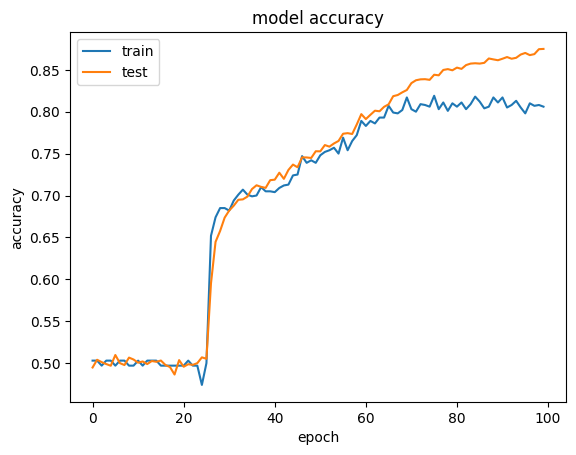

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [189]:
model.save('mybrandnewmodel.h5')

c:\Users\praje\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [190]:
pred_result = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 4ms/step


In [191]:
pred_result.shape

(1000, 38)

In [192]:
pred_result[0]

array([9.7214115e-10, 1.1831629e-09, 1.6249837e-09, 1.1911468e-09,
       1.1347503e-09, 9.2899044e-10, 1.1002784e-09, 1.5492873e-09,
       1.2515031e-01, 9.1088309e-10, 1.1984118e-09, 1.1175840e-09,
       1.1806246e-09, 1.4194135e-09, 1.3246549e-09, 1.2989297e-09,
       1.4753035e-09, 9.7052566e-10, 9.8696806e-10, 7.8377599e-10,
       1.0823322e-09, 8.4453672e-10, 9.3613373e-10, 8.8362301e-10,
       1.1338677e-09, 1.3121721e-09, 9.1875252e-10, 8.7946994e-10,
       1.0312252e-09, 1.4756638e-09, 1.1433929e-09, 1.0122213e-09,
       1.2901938e-09, 8.9142682e-10, 9.4417429e-10, 1.2649015e-09,
       1.1632076e-09, 8.7484968e-01], dtype=float32)

In [193]:
index_word = {index: word for word, index in tokenizer.word_index.items()}

In [194]:
predictions = np.argmax(pred_result, axis=1)
pred_answers = [index_word[pred] for pred in predictions]
pred_answers

['no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'ye

We Now take a Self-designed test case

In [195]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [196]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [197]:
my_question = "Is the football in the garden ?"

In [198]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [199]:
# The answer should be 'yes'.
mydata = [(my_story.split(), my_question.split(), 'yes')]

In [200]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [201]:
pred_result = model.predict([my_story, my_ques])

1/1 [==============================] - 0s 33ms/step


In [202]:
val_max = np.argmax(pred_result[0])

In [203]:
# Get the answer corresponding to the highest predict probabilty.
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [204]:
k

'yes'

In [205]:
# Find out what's the highest predict probability.
pred_result[0][val_max]

0.8417289